# Intro to chemistRy

Welcome to the *chemistRy*, a product of the JMU Department of Chemistry and Biochemistry. This is the second lesson in the series which  aims to teach you about data visualization, data tidying, statistics, and a bit of R coding. If you don't know how to code, don't worry! These lessons assume no prior knowledge of code or R.

A few things to start:

1.   These lessons only work in Google Chrome
2.   If you want to save your progress, go to File> Save a Copy in Drive; then locate a spot in your Drive folder
3.   This is a special Google Colab for R, regular Colab runs in Python. If you want to make your own R notebook, follow this [link](https://colab.research.google.com/drive/16u6W4rl-AHX_yXlQx7HcgjAuNimfqwj_).

If you have questions, feel free to contact Dr. Chris Berndsen in the JMU Chemistry Department.


In [ ]:
#@title Run this block always
install.packages("modeldata")
## load packages
library(tidyverse)
library(modeldata)

# Visualizing data

Data come in many types and can be analyzed in many ways. In Chemistry and Biochemistry, we sometimes use statistics to summarize the measurements, while other times we show the raw data such as measuring the absorbance of a sample. In most instances, both showing a plot and a summary table of statistics is helpful, especially when you have complex data. In this module, we will introduce some best practices and expectations for plotting data. We will also introduce the basics of plotting data in R using the `ggplot2` package.

---

## Why visualize data?
Chemistry data often come in the form of numbers. Think about some of the values you may have determined in lab: mass, density, rate, absorbance, pH, etc. Comparison of a few measurements is easy, however as the size of the data increases, so does the complexity of the analysis required to make comparisons.

The table below shows part of a data set on the content of 100 meat samples. The data were collected by spectroscopy and those measurements used to calculate the fat, water, and protein content of the meat sample. Looking at the data, what is the relationship between the fat, water, and protein content?




In [ ]:
#@title Run this block to see the table
library(modeldata)
data(meats)

# convert meats to long format
tbl <- meats %>%
  select(101:103)

colnames(tbl) <- c("% water", "% fat", "% protein")


head(tbl)

Using the numbers alone, the relationships between these parameters is not clear. This is when making a picture of the data in the form of a plot is valuable. Let's take a look at a plot showing the percent fat vs. the percent protein.

In [ ]:
#@title Run this block to see the plot
data("meats")

# convert meats to long format
tbl <- meats %>%
  select(101:103)

ggplot(tbl, aes(x = protein, y = fat)) +
  geom_point(alpha = 0.5) +
  theme_classic() +
  theme(legend.position = "none",
        axis.text = element_text(size = 20),
        axis.title = element_text(size = 24)) +
  labs(x = "% protein", y = "% fat")


Plotting the reveals a strong trend where as protein content increases, the fat content decreases. Without plotting the data, this trend would not be obvious. One caveat is that while this plot shows the trend, it is not very effective at communicating the data. In the next two sections, you will explore both plotting data to observe trends and formatting the plot to communicate data effectively.

---


In the next sections you will be plotting a data set in a few different ways and asked to provide information about the content. Then you will be shown the elements of a good plot and be tasked with constructing this plot.

---

Pre-loaded is a data measuring the rate of cricket chirps from two different species at several temperatures. The data frame is shown below so you can see how the observations are labeled in the data.

---


In [ ]:
#@title Run this block to see the data frame organization
data(crickets)
head(crickets)



For this part of the module, **we want to visualize the effect of temperature on cricket. How would you plot that?**

Work to plot the data and then answer the questions below. As you are making the plot, think about 1) how you can show the trend in the measurements and 2) how the data fall along that trend.

In [ ]:
# load the data, don't change lines 2 or 3
data(crickets)
df <- crickets

# make a ggplot2
ggplot(df) +

# pick the geom and fill in the x and y values
  geom_ (aes(x = , y = ))

# you can customize this further
# remember to add the + sign on line 9 if you do!


So now you have a basic plot of rate vs temperature. Great!

Even if you used a different geom or added customization, hopefully it looks something like this:

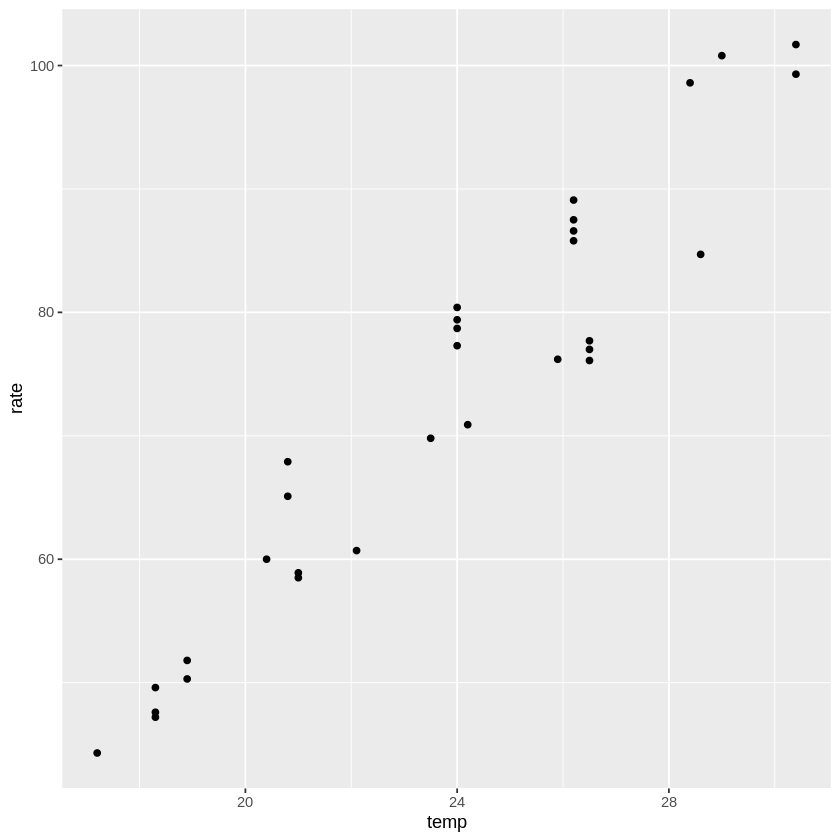


What aspects of the plot could be improved to make it more informative and accessible to your viewer?

---

Good data visuals have a few common elements:


1.   **Labels** -- Describe what information is plotted and units
2.   **Color** -- Make the data points stand out and differentiate between variables as needed
3.   **Text** -- Clean font and large enough to read
4.   **Simplicity** -- Show only what is needed to make your point
5.   **Legend** -- Describe the experiment and data in text

---
Let's add those elements to the plot, exploring bad examples and fixing them. Then, you will combine the good elements together into the final plot.

---

## Labels

Poor labeling or not labeling leaves your viewer to speculate as to what they are seeing. Similarly, not having units on your axes leads to frustration from your chem professors 😉 and can also change the interpretation of the data.

Good data sets will have some way to indicate the units, whether in the form of a data dictionary, a README file, or embedding units in the column names. Run the code below to learn about the crickets data and the units.


In [ ]:
# first run the code below to lean more about the data set
# this will open a help window to describe the data
?modeldata::crickets



Below is the rate vs. temperature plot, but with poor units. Run the code to make the plot, then fix the code to improve the units based on what you learned from the help information.

In [ ]:
df <- crickets

ggplot(df) +
  geom_point(aes(x = rate, y = temp)) +

  # change the code in line 7 to correctly title the axes
  labs(x = "how fast", y = "how hot")

## Color
Color is one of the most used and abused features of a plot. A poor color scheme uses hard to see colors or colors that are indistinguishable from each other. Reds and greens are a popular combination, but if you are [color blind](https://en.wikipedia.org/wiki/Color_blindness#/media/File:Braeburn_GrannySmith_dichromat_sim.jpg), these colors can look like two similar shades of grey. Therefore, it is important to choose colors that contrast well for viewers of all visual states.

In the crickets data set there are two sub-sets of data, one for each species of cricket. Let's color the data by species and then, decide if we need to manually define the colors based on the result. The list of color names for ggplot is [here](https://www.pinterest.com/pin/536139530610965661/).

In [ ]:
df <- crickets

ggplot(df) +
  # make the data color dependent on the species
  geom_point(aes(x = rate, y = temp, color = )) +

  # if the color scheme is good, don't change line 9, if bad, remove the # and add the colors within the c()
  # Make sure that you put quotes around the color names
  # scale_color_manual(values = c())



## Text
Legible text can be seen from a reasonable distance away and the letters don't appears to overlap. The default font in ggplot2 is a good general font but the letters or words need to be resized or bolded. The text in ggplot is changed within the theme function and is constructed:

`theme(axis.text = element_text(...))`

You define both which text to change and that you want to modify the text properties.

In [ ]:
df <- crickets

ggplot(df) +
  # make the data color dependent on the species
  geom_point(aes(x = rate, y = temp)) +

  # change the axis.text and titles. Make the title size 24, the text size 20
  theme(axis.text = element_text(size = ),
        axis.title = )



## Simplicity

This aspect of data visualization is one of the harder to learn. Because we are so familiar with our data, we often make the visual so that we can understand it, while forgetting that our audience is not as familiar with our experiment. **We must always remember that a visual is meant to be viewed by others to communicate our results.**

In the plot below, the author made a fancy looking plot, but forgot to make it communicate the results well. Remove the unecessary elements to create a simpler plot.

In [ ]:
df <- crickets

ggplot(df) +

  geom_point(aes(x = rate, y = temp, color = species, size = temp)) +

  geom_smooth(aes(x = rate, y = temp), method = "lm", se = FALSE, color = "black", size = 4) +

  geom_line(aes(x = rate, y = temp, color = species), size = 2) +

  theme_linedraw() +

  theme(axis.text = element_text(size = 22),
        axis.title = element_text(size = 26),
        strip.text = element_text(size = 24)) +

  facet_wrap(.~species)

In the final code block, make a plot of the data using all the fixes that you made above. Add further customizations if you want to make this a good data visual.

In [ ]:
df <- crickets

ggplot(df) +
# add the color by species command
  geom_point(aes(x = rate, y = temp)) +
# add your lines of good code below